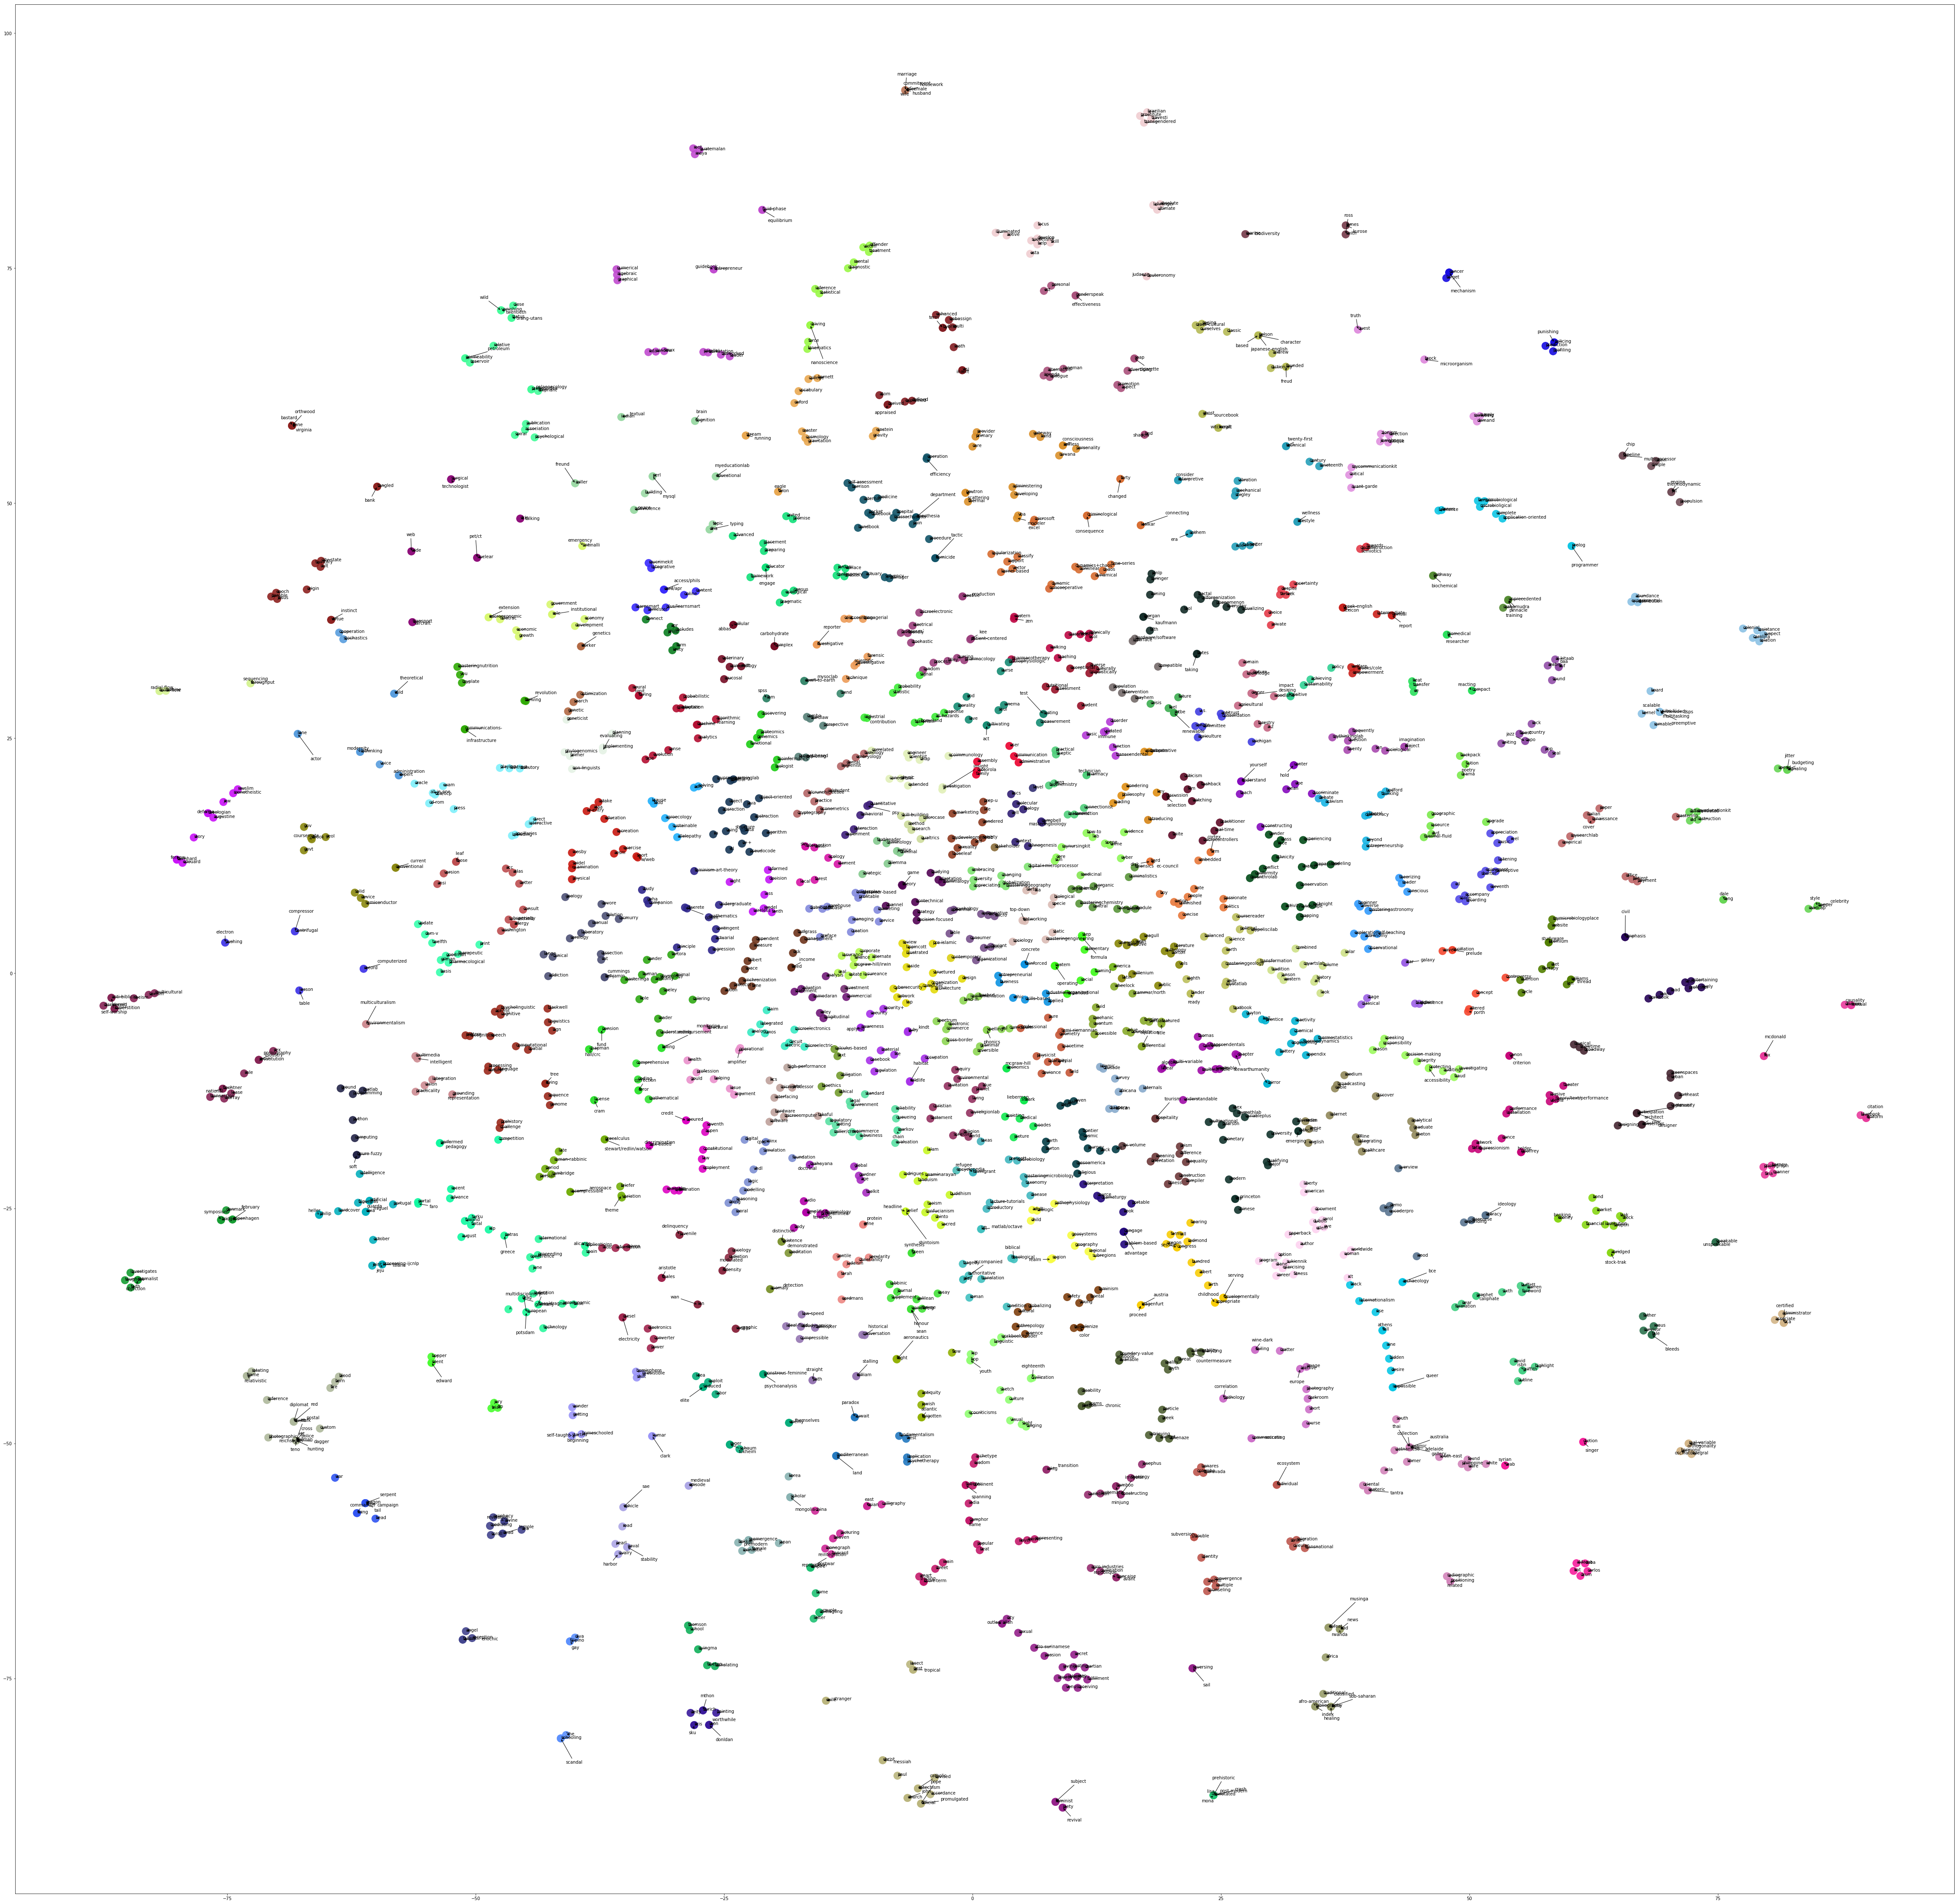

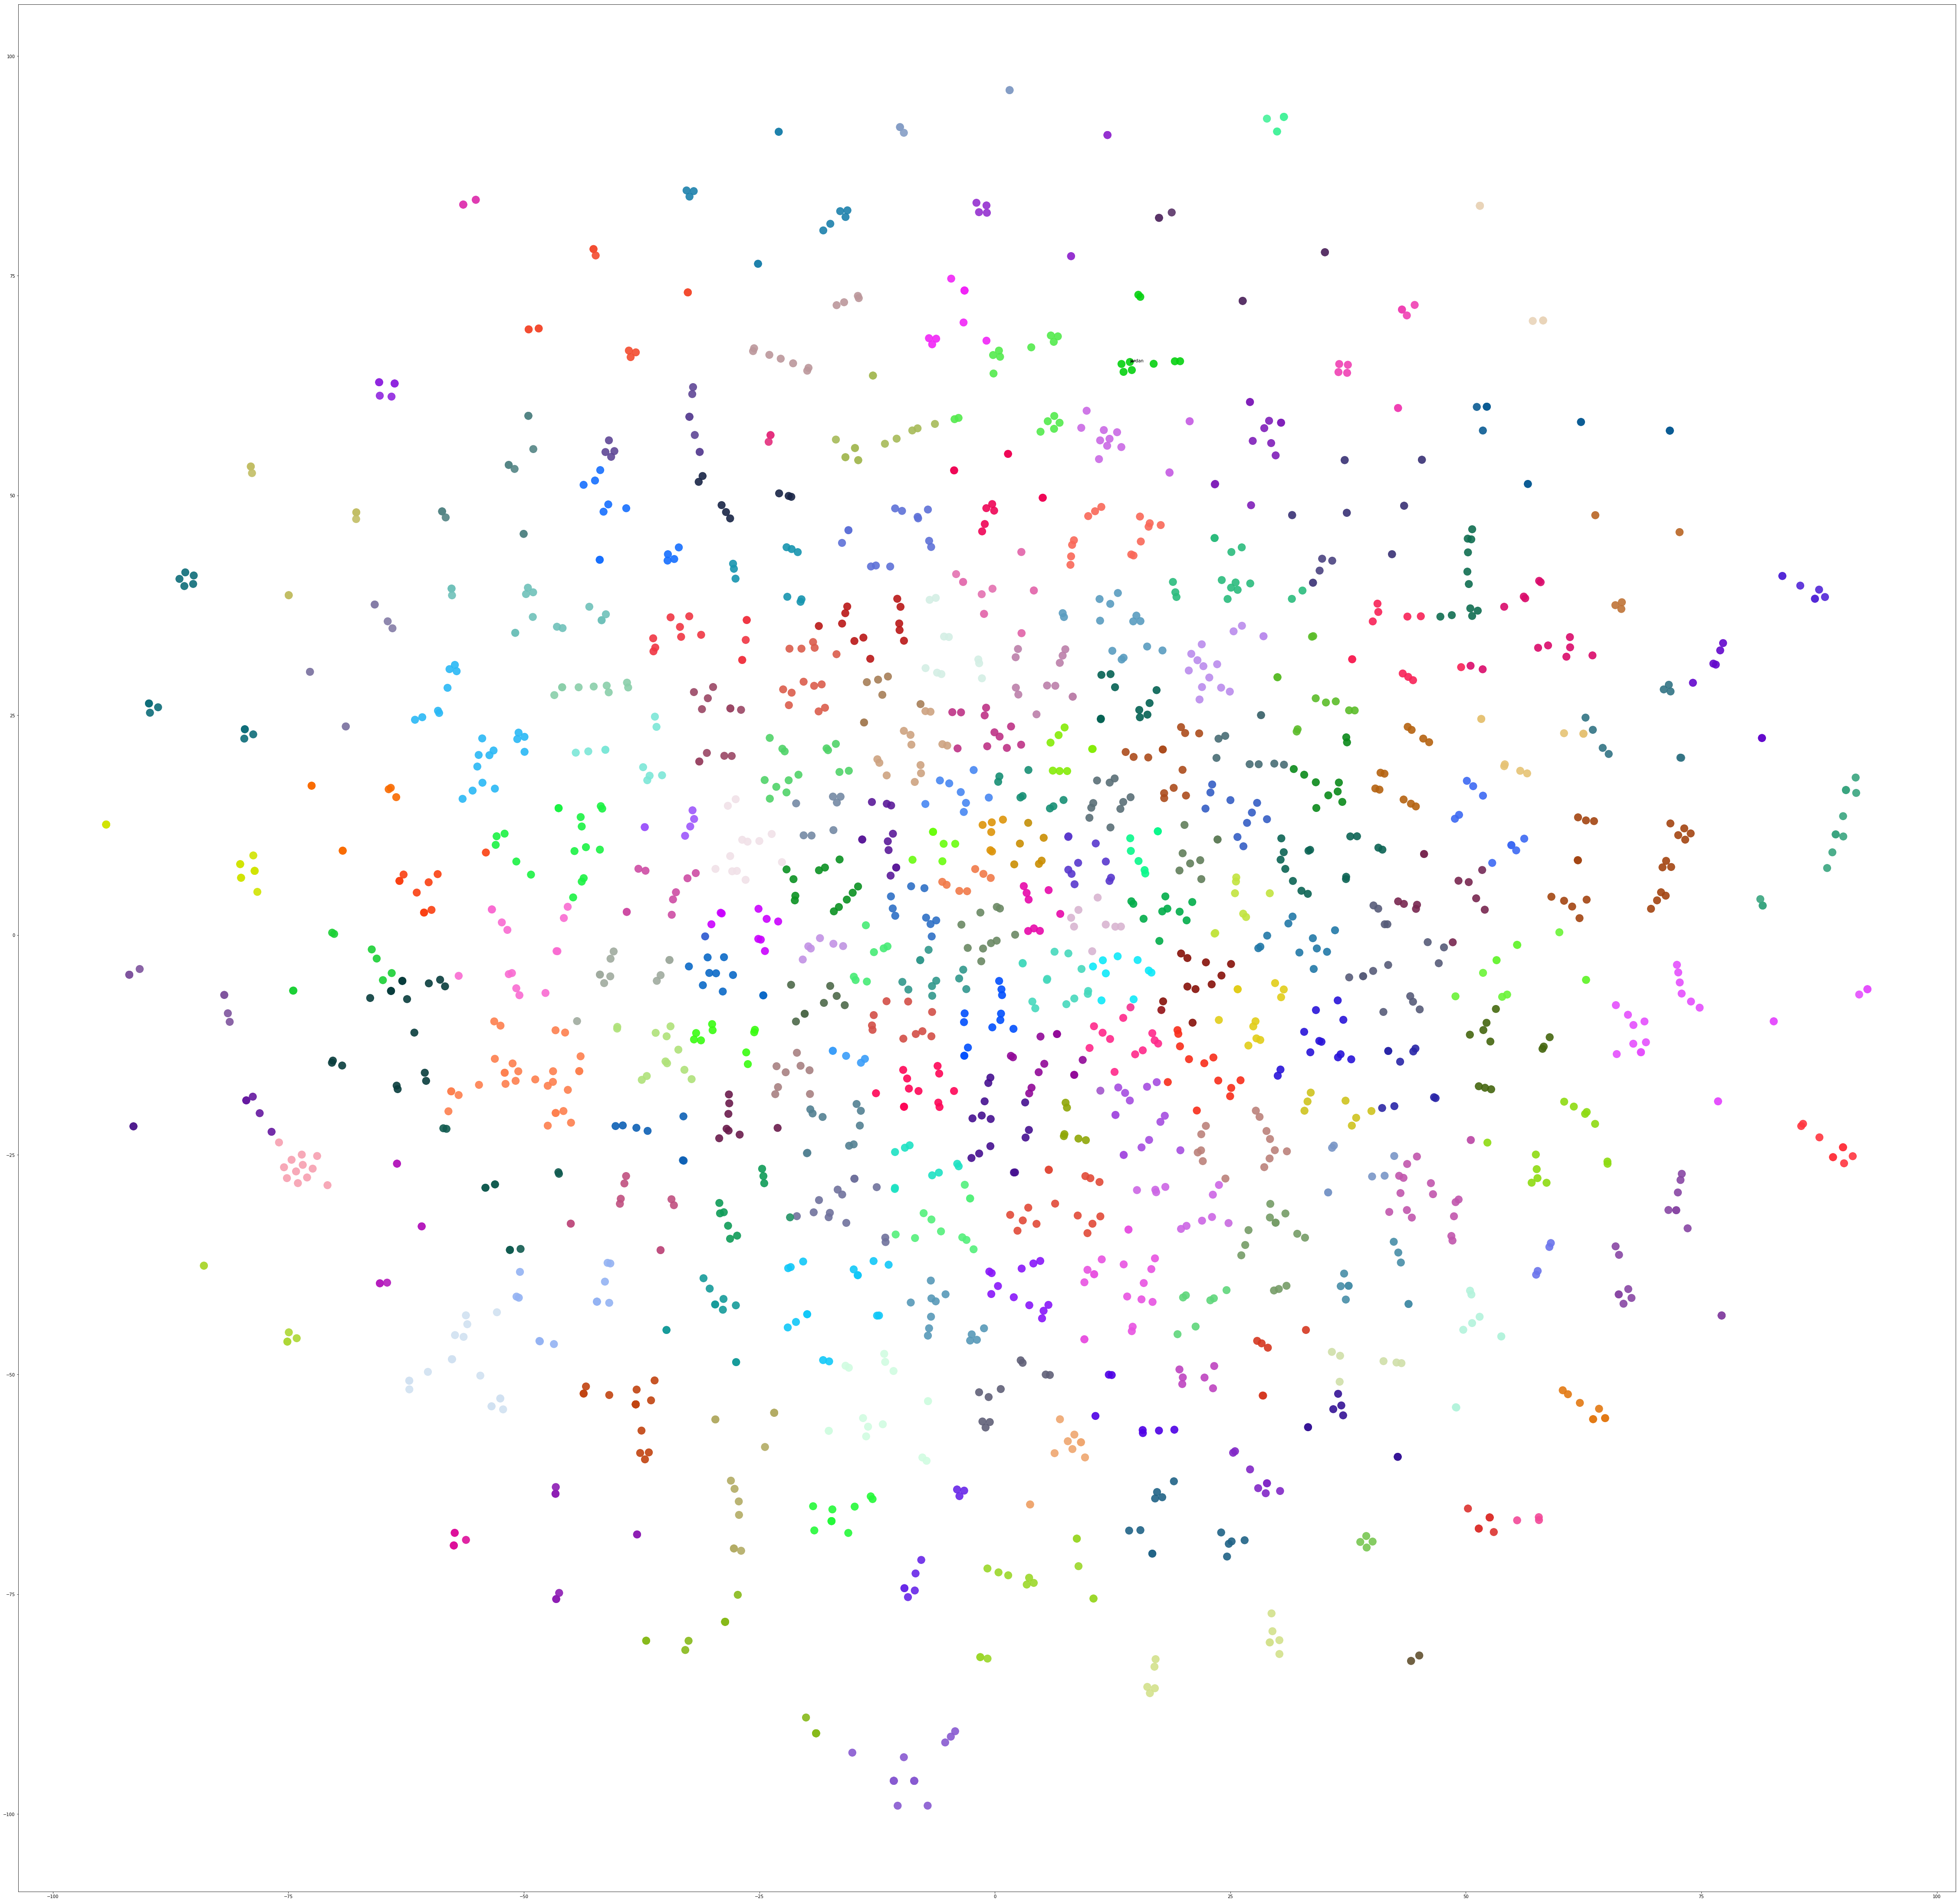

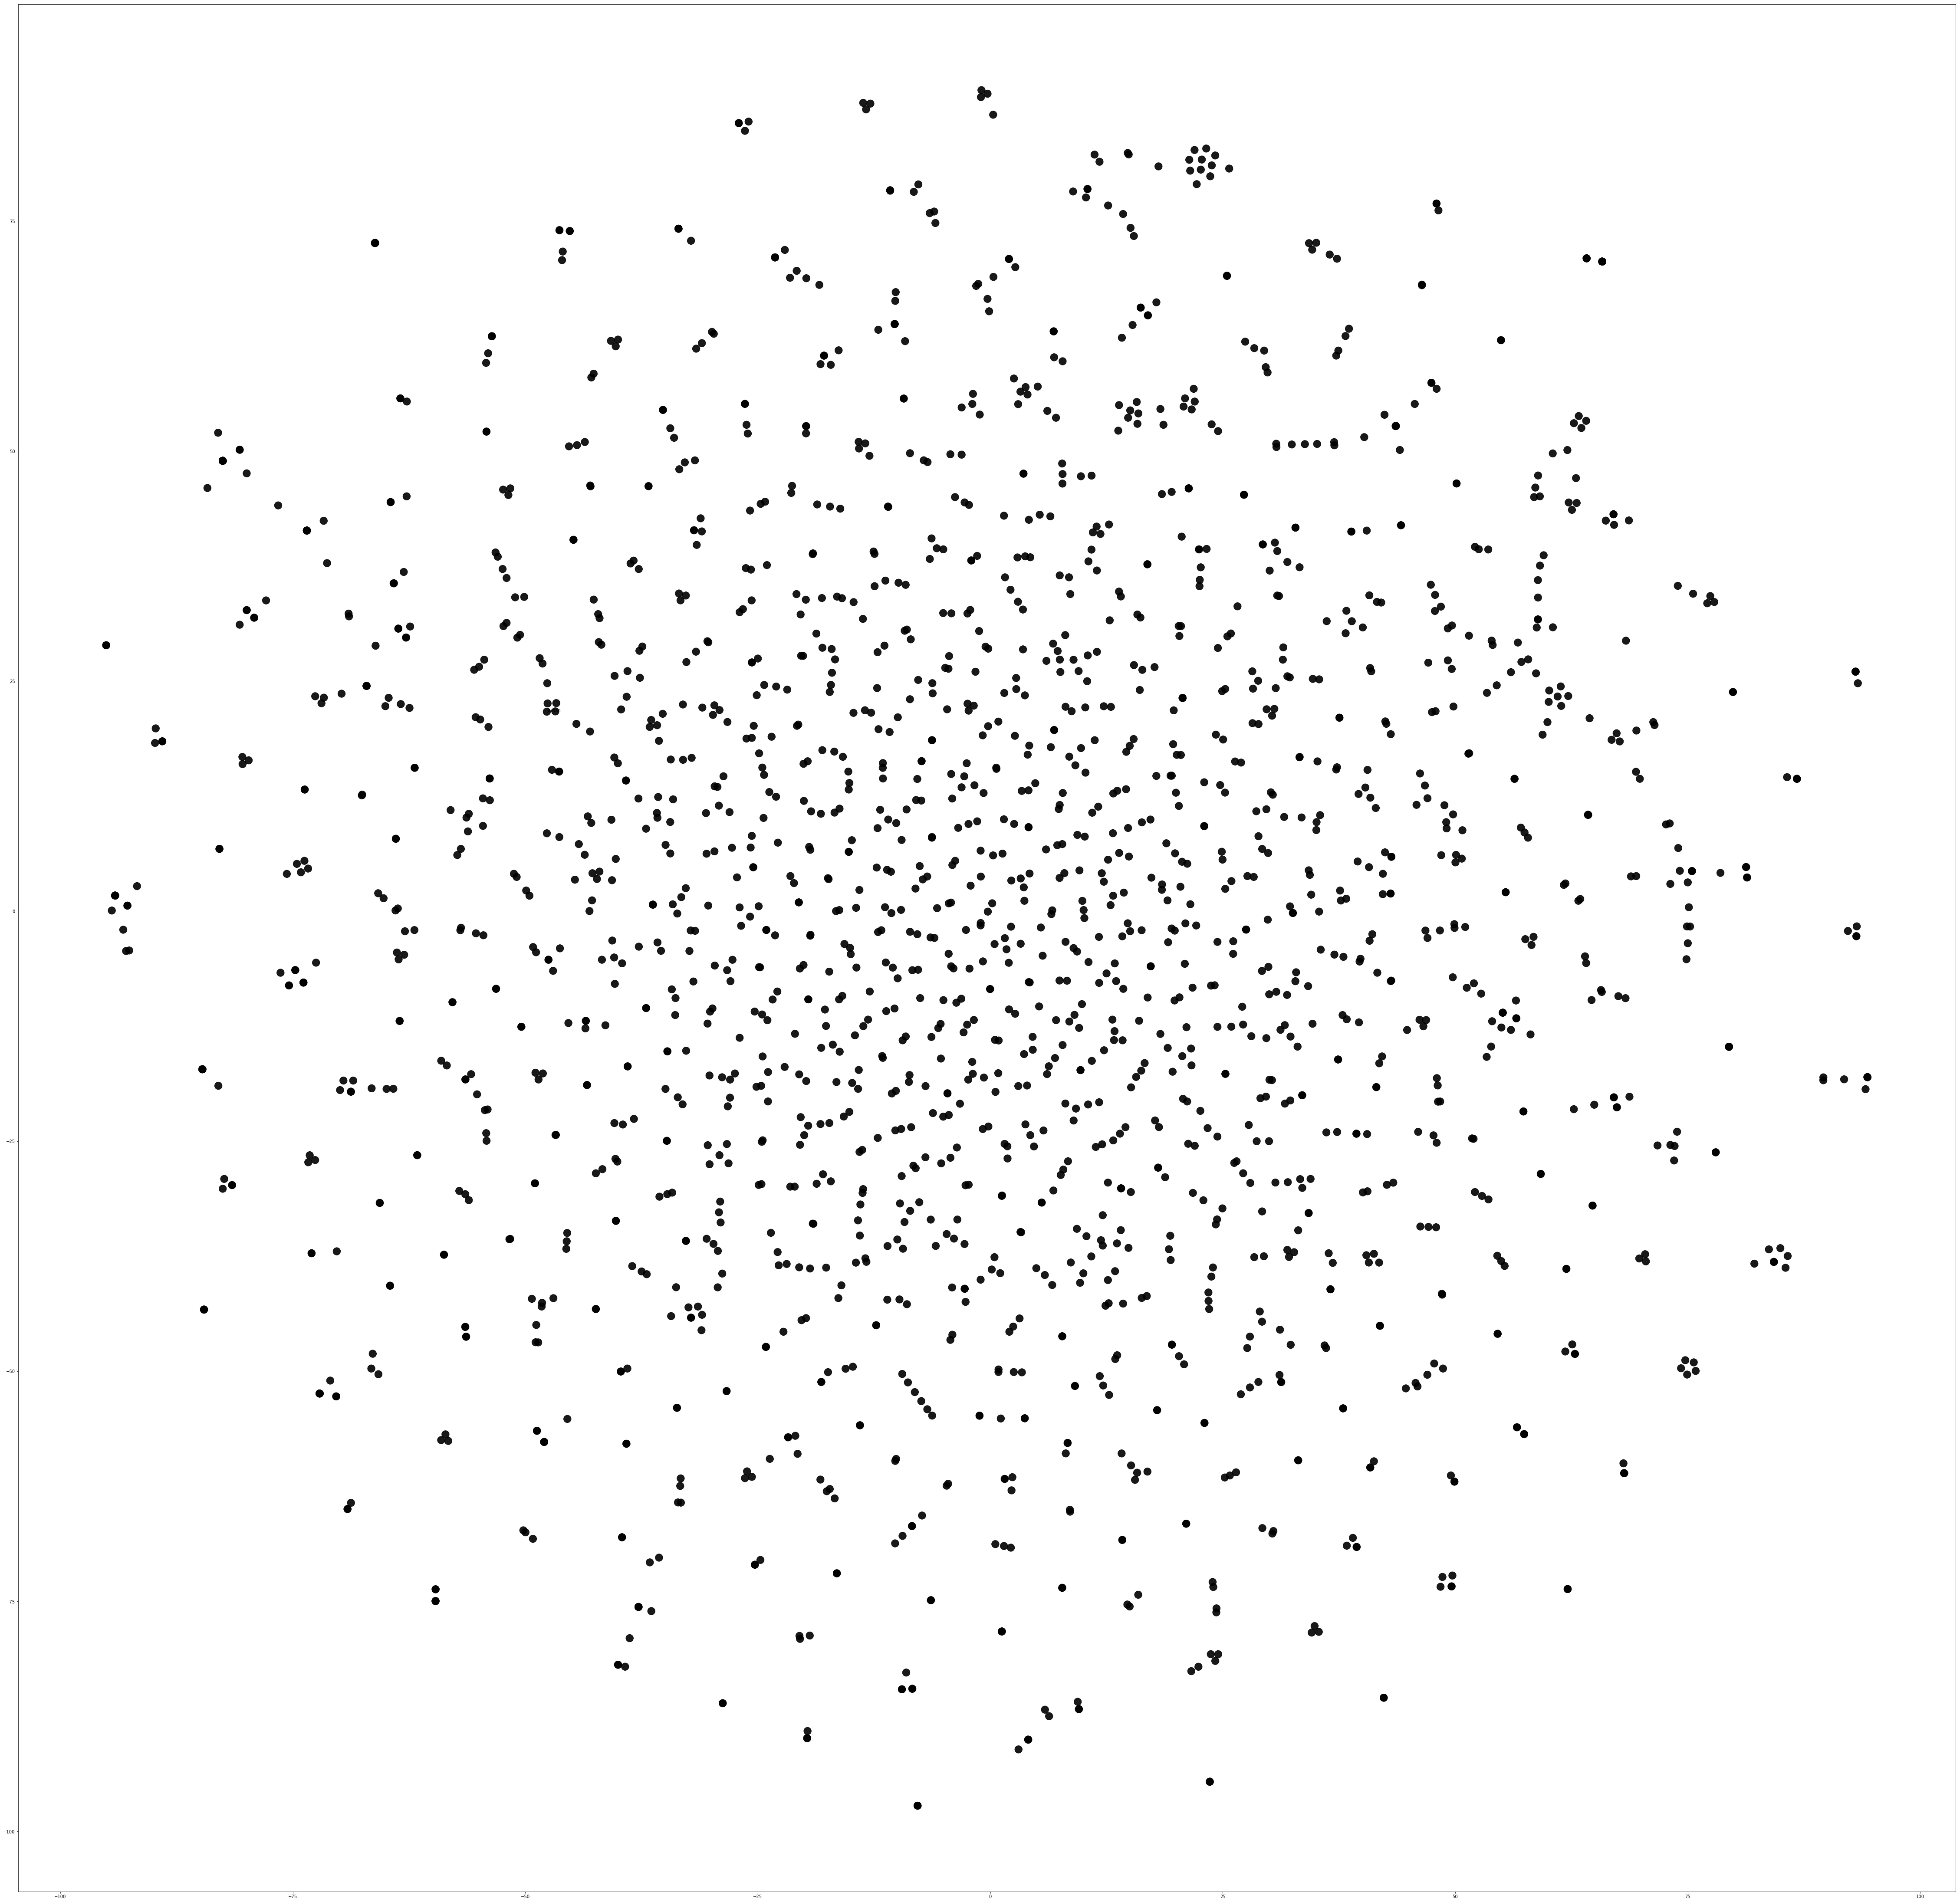

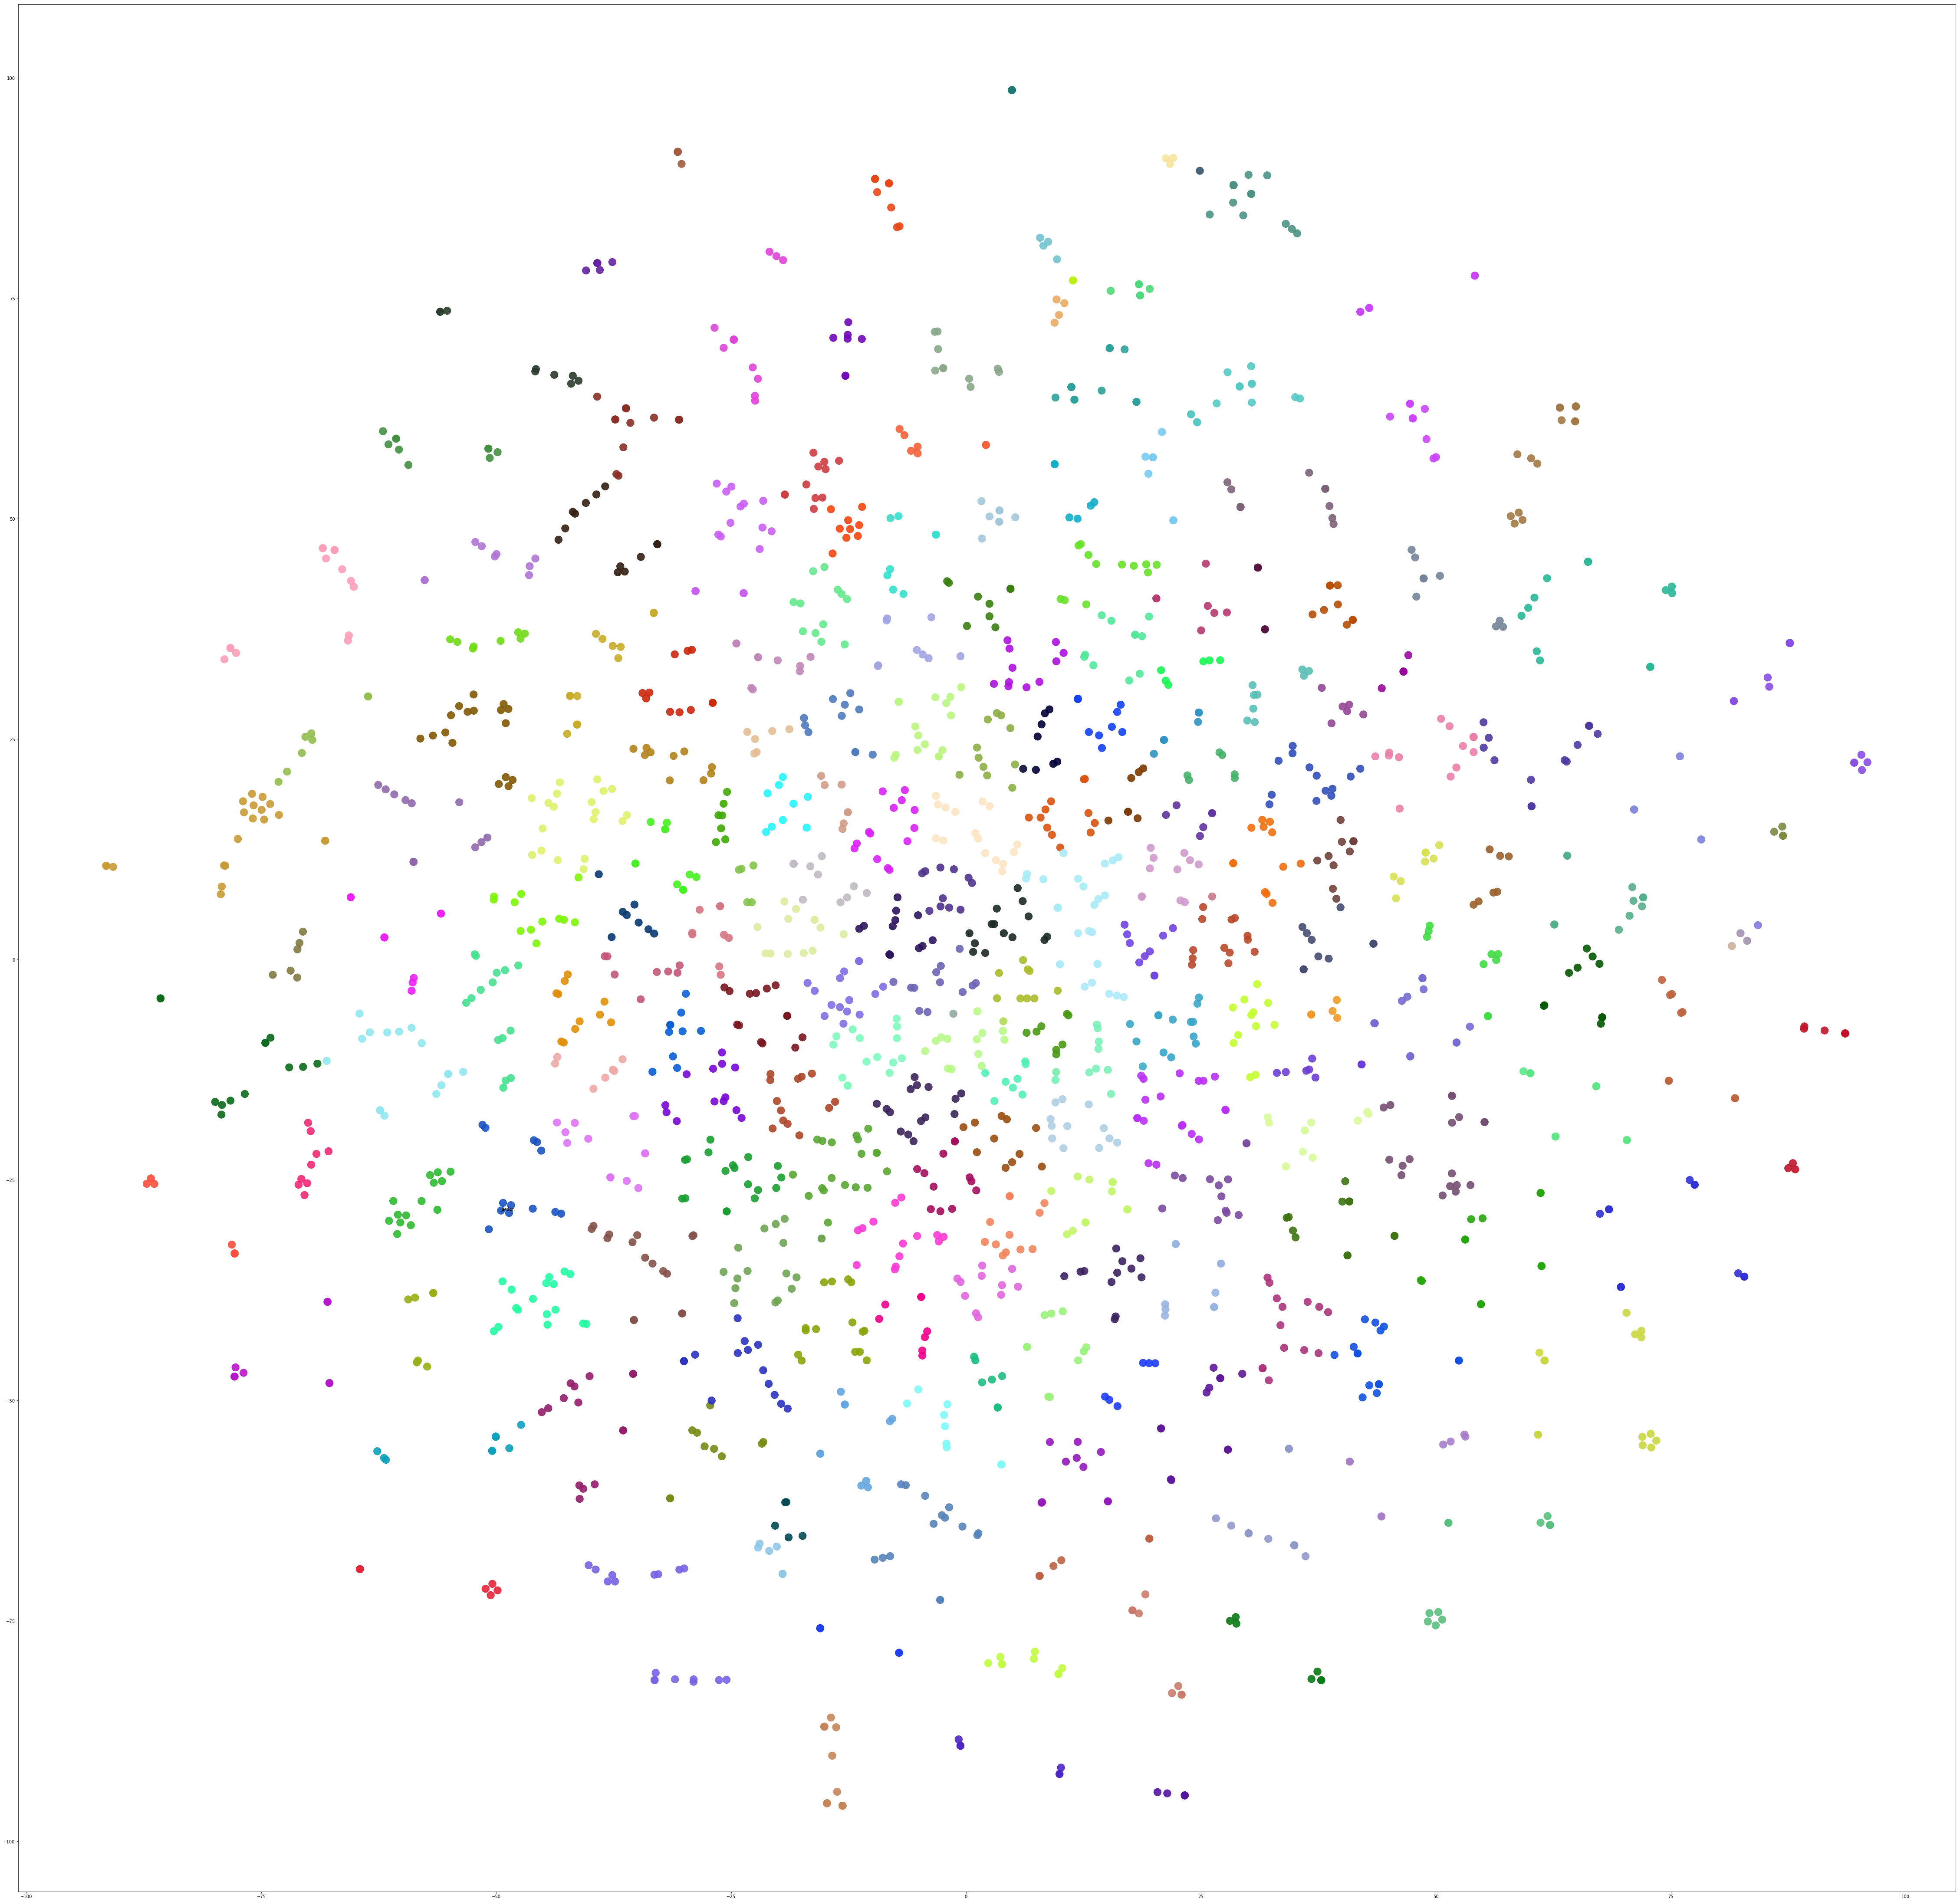

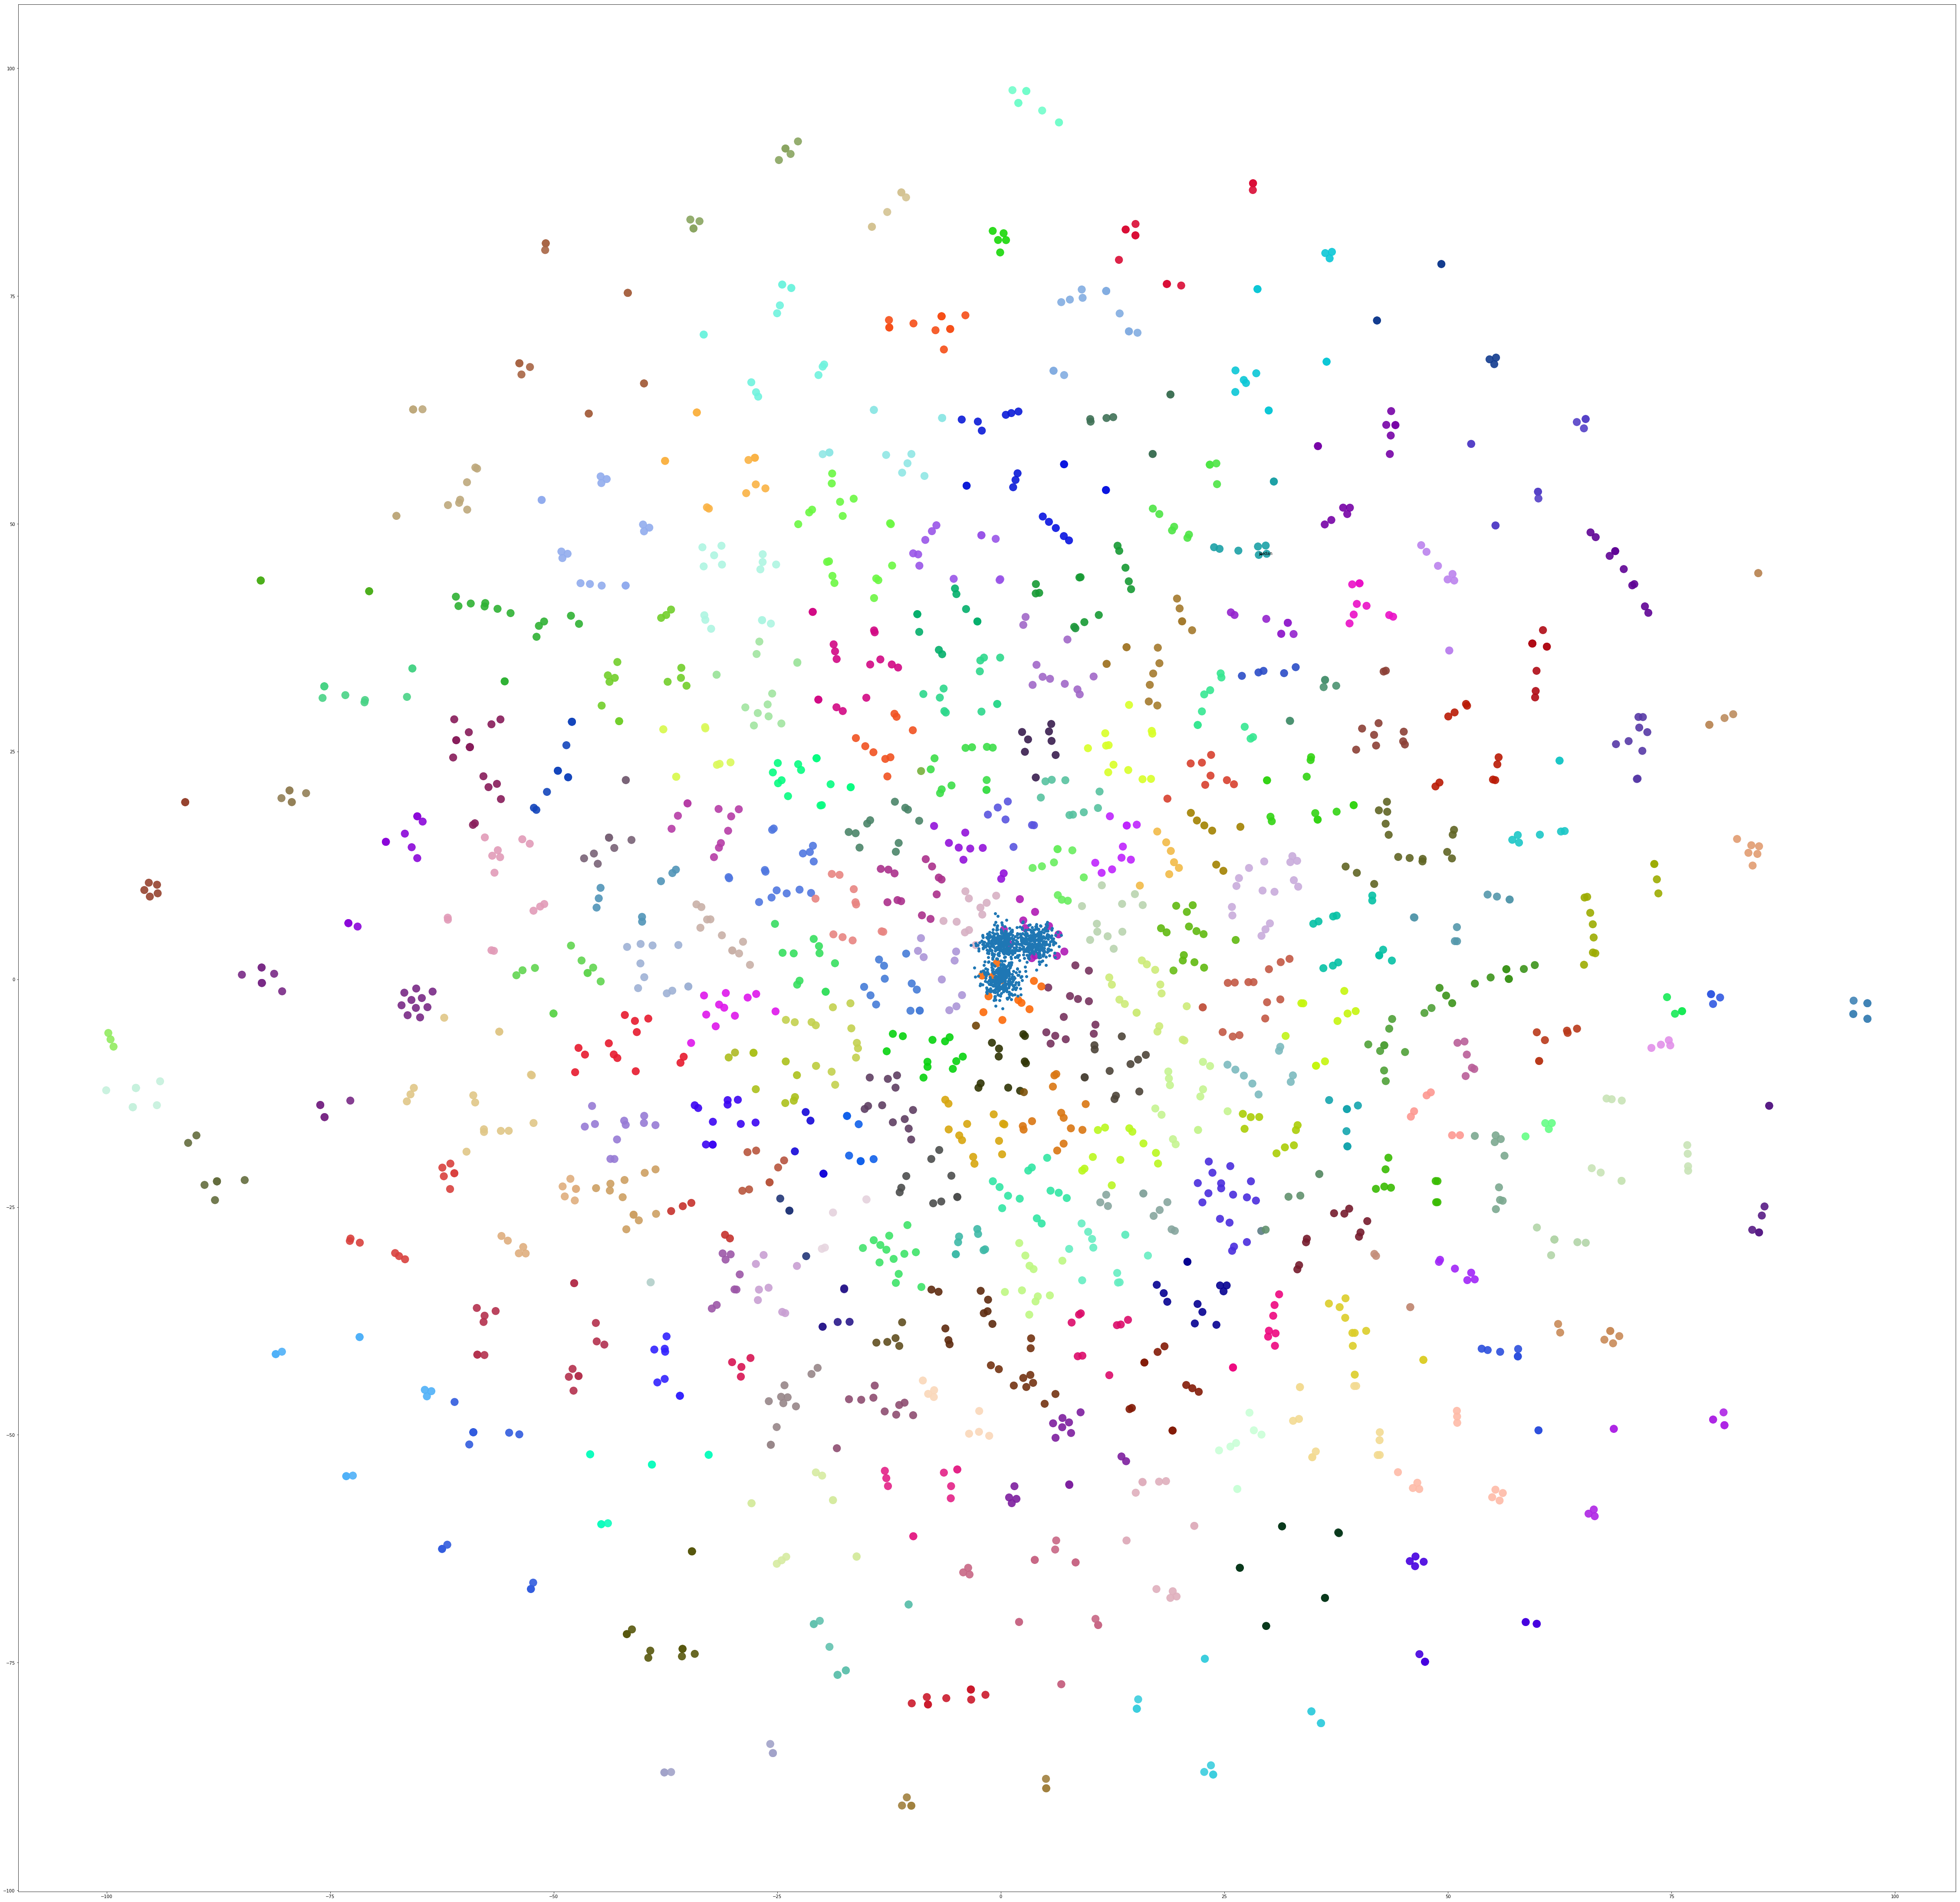

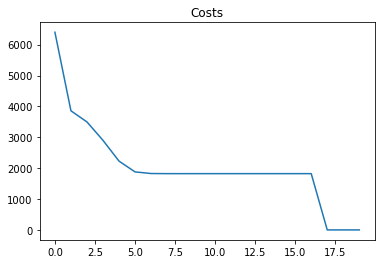

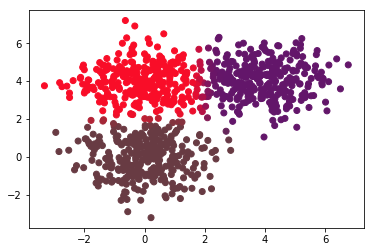

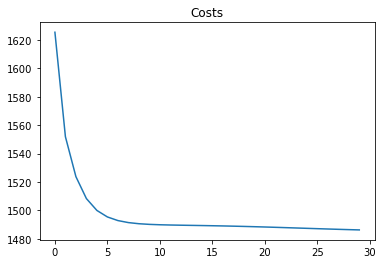

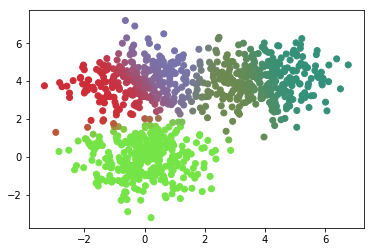

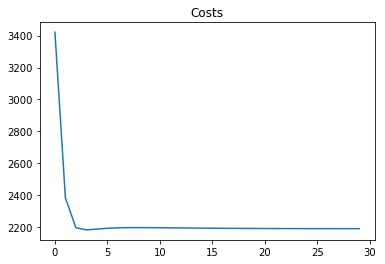

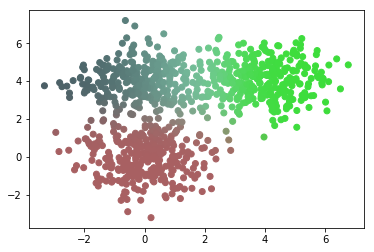

In [39]:

# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt


def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


def plot_k_means(X, K, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                # R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)
        # assert(np.abs(R - R2).sum() < 1e-10)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    return M, R


def get_simple_data():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X


def main():
    X = get_simple_data()

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K)

    K = 5 # what happens if we choose a "bad" K?
    plot_k_means(X, K, max_iter=30)

    K = 5 # what happens if we change beta?
    plot_k_means(X, K, max_iter=30, beta=0.3)


if __name__ == '__main__':
    main()

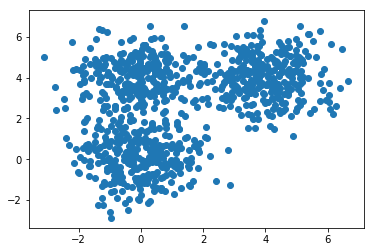

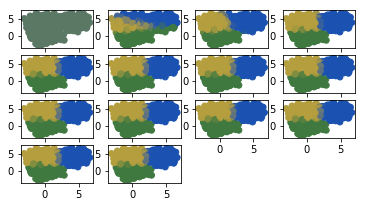

In [40]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt


def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k]*d(M[k], X[n])
    return cost


def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.ones((N, K)) / K

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # moved the plot inside the for loop
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)

        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break
    plt.show()


def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K)

    # K = 5 # what happens if we choose a "bad" K?
    # plot_k_means(X, K, max_iter=30)

    # K = 5 # what happens if we change beta?
    # plot_k_means(X, K, max_iter=30, beta=0.3)


if __name__ == '__main__':
    main()

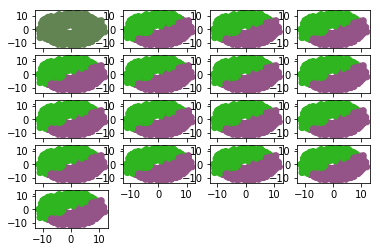

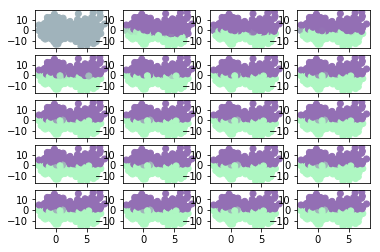

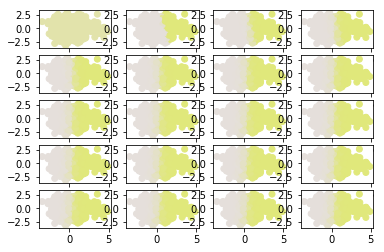

In [41]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
#from kmeans import plot_k_means


def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X


def main():
    # donut
    X = donut()
    plot_k_means(X, 2)

    # elongated clusters
    X = np.zeros((1000, 2))
    X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
    X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
    plot_k_means(X, 2)

    # different density
    X = np.zeros((1000, 2))
    X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
    X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
    plot_k_means(X, 2)



if __name__ == '__main__':
    main()

In [42]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python

# data is from https://www.kaggle.com/c/digit-recognizer
# each image is a D = 28x28 = 784 dimensional vector
# there are N = 42000 samples
# you can plot an image by reshaping to (28,28) and using plt.imshow()

from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('/Users/hector/Downloads/train.csv')
    data = df.as_matrix()
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y


# hard labels
def purity2(Y, R):
    # maximum purity is 1, higher is better
    C = np.argmax(R, axis=1) # cluster assignments

    N = len(Y) # number of data pts
    K = len(set(Y)) # number of labels

    total = 0.0
    for k in range(K):
        max_intersection = 0
        for j in range(K):
            intersection = ((C == k) & (Y == j)).sum()
            if intersection > max_intersection:
                max_intersection = intersection
        total += max_intersection
    return total / N


def purity(Y, R):
    # maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 # we don't strictly need to store this
        max_intersection = 0
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N


# hard labels
def DBI2(X, R):
    N, D = X.shape
    _, K = R.shape

    # get sigmas, means first
    sigma = np.zeros(K)
    M = np.zeros((K, D))
    assignments = np.argmax(R, axis=1)
    for k in range(K):
        Xk = X[assignments == k]
        M[k] = Xk.mean(axis=0)
        # assert(Xk.mean(axis=0).shape == (D,))
        n = len(Xk)
        diffs = Xk - M[k]
        sq_diffs = diffs * diffs
        sigma[k] = np.sqrt( sq_diffs.sum() / n )


    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K



def DBI(X, M, R):
    # ratio between sum of std deviations between 2 clusters / distance between cluster means
    # lower is better
    N, D = X.shape
    K, _ = M.shape

    # get sigmas first
    sigma = np.zeros(K)
    for k in range(K):
        diffs = X - M[k] # should be NxD
        squared_distances = (diffs * diffs).sum(axis=1) # now just N
        weighted_squared_distances = R[:,k]*squared_distances
        sigma[k] = np.sqrt( weighted_squared_distances.sum() / R[:,k].sum() )

    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K


def main():
    # mnist data
    X, Y = get_data(10000)

    # simple data
    # X = get_simple_data()
    # Y = np.array([0]*300 + [1]*300 + [2]*300)

    print("Number of data points:", len(Y))
    M, R = plot_k_means(X, len(set(Y)))
    # Exercise: Try different values of K and compare the evaluation metrics
    print("Purity:", purity(Y, R))
    print("Purity 2 (hard clusters):", purity2(Y, R))
    print("DBI:", DBI(X, M, R))
    print("DBI 2 (hard clusters):", DBI2(X, R))

    # plot the mean images
    # they should look like digits
    for k in range(len(M)):
        im = M[k].reshape(28, 28)
        plt.imshow(im, cmap='gray')
        plt.show()


## CHOOSING K

In [43]:

# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt


def main():
    X = get_simple_data()

    plt.scatter(X[:,0], X[:,1])
    plt.show()

    costs = np.empty(10)
    costs[0] = None
    for k in range(1, 10):
        M, R = plot_k_means(X, k, show_plots=False)
        c = cost(X, R, M)
        costs[k] = c

    plt.plot(costs)
    plt.title("Cost vs K")
    plt.show()


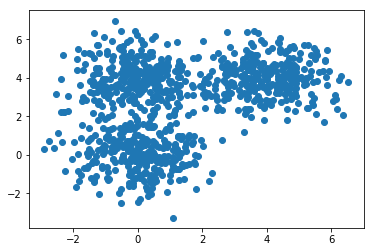

TypeError: plot_k_means() got an unexpected keyword argument 'show_plots'

In [44]:
main()

## Finding Clusters of Related Words

In [ ]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import networkx as nx
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding as LLE
from sklearn.feature_extraction.text import TfidfTransformer

wordnet_lemmatizer = WordNetLemmatizer()

titles = [line.rstrip() for line in open('/Users/hector/Documents/machine_learning_examples/nlp_class/all_book_titles.txt')]

# copy tokenizer from sentiment example
stopwords = set(w.rstrip() for w in open('/Users/hector/Documents/machine_learning_examples/nlp_class/stopwords.txt'))
# add more stopwords specific to this problem
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens


# create a word-to-index map so that we can create our word-frequency vectors later
# let's also save the tokenized versions so we don't have to tokenize again later
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
print("num titles:", len(titles))
print("first title:", titles[0])
for title in titles:
    try:
        title = title.encode('ascii', 'ignore') # this will throw exception if bad characters
        title = title.decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)


In [ ]:
# now let's create our input matrices - just indicator variables for this example - works better than proportions
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] += 1
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

def plot_k_means(X, K, index_word_map, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                # R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 10e-5:
                break

    if show_plots:
        # plt.plot(costs)
        # plt.title("Costs")
        # plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.figure(figsize=(80.0, 80.0))
        plt.scatter(X[:,0], X[:,1], s=300, alpha=0.9, c=colors)
        annotate1(X, index_word_map)
        # plt.show()
        plt.savefig("test.png")


    # print out the clusters
    hard_responsibilities = np.argmax(R, axis=1) # is an N-size array of cluster identities
    # let's "reverse" the order so it's cluster identity -> word index
    cluster2word = {}
    for i in range(len(hard_responsibilities)):
        word = index_word_map[i]
        cluster = hard_responsibilities[i]
        if cluster not in cluster2word:
            cluster2word[cluster] = []
        cluster2word[cluster].append(word)

    # print out the words grouped by cluster
    for cluster, wordlist in cluster2word.items():
        print("cluster", cluster, "->", wordlist)

    return M, R

# def annotate2(X, index_word_map, k=0.1):
#   N, D = X.shape

#   # create graph
#   G = nx.DiGraph()
#   data_nodes = []
#   init_pos = {}
#   for i in range(N):
#     x, y = X[i]
#     label = index_word_map[i]
#     data_str = 'data_{0}'.format(label)
#     G.add_node(data_str)
#     G.add_node(label)
#     G.add_edge(label, data_str)
#     data_nodes.append(data_str)
#     init_pos[data_str] = (x, y)
#     init_pos[label] = (x, y)
#   pos = nx.spring_layout(G, pos=init_pos, fixed=data_nodes, k=k)

#   # undo spring_layout's rescaling
#   pos_after = np.vstack([pos[d] for d in data_nodes])
#   pos_before = np.vstack([init_pos[d] for d in data_nodes])
#   scale, shift_x = np.polyfit(pos_after[:,0], pos_before[:,0], 1)
#   scale, shift_y = np.polyfit(pos_after[:,1], pos_before[:,1], 1)
#   shift = np.array([shift_x, shift_y])
#   for key, val in pos.items():
#     pos[key] = (val*scale) + shift


#   for label, data_str in G.edges():
#     plt.annotate(
#       label,
#       xy=pos[data_str], xycoords='data',
#       xytext=pos[label], textcoords='data',
#       arrowprops=dict(arrowstyle="->", color='black'),
#     )

#   # expand limits
#   all_pos = np.vstack(pos.values())
#   x_span, y_span = np.ptp(all_pos, axis=0)
#   mins = np.min(all_pos-x_span*0.15, 0)
#   maxs = np.max(all_pos+y_span*0.15, 0)
#   plt.xlim([mins[0], maxs[0]])
#   plt.ylim([mins[1], maxs[1]])


def annotate1(X, index_word_map, eps=0.1):
    N, D = X.shape
    placed = np.empty((N, D))
    for i in range(N):
        x, y = X[i]

    # if x, y is too close to something already plotted, move it
    close = []

    x, y = X[i]
    for retry in range(3):
        for j in range(i):
            diff = np.array([x, y]) - placed[j]

                # if something is close, append it to the close list
            if diff.dot(diff) < eps:
                close.append(placed[j])

        if close:
            # then the close list is not empty
            x += (np.random.randn() + 0.5) * (1 if np.random.rand() < 0.5 else -1)
            y += (np.random.randn() + 0.5) * (1 if np.random.rand() < 0.5 else -1)
            close = [] # so we can start again with an empty list
        else:
            # nothing close, let's break
            break

    placed[i] = (x, y)

    plt.annotate(
      s=index_word_map[i],
      xy=(X[i,0], X[i,1]),
      xytext=(x, y),
      arrowprops={
        'arrowstyle' : '->',
        'color' : 'black',
      }
    )

print("vocab size:", current_index)

transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()

reducer = TSNE()
Z = reducer.fit_transform(X)
plot_k_means(Z[:,:2], current_index//10, index_word_map, show_plots=True)

## HIERARCHICAL CLUSTERING

Z.shape: (899, 4)


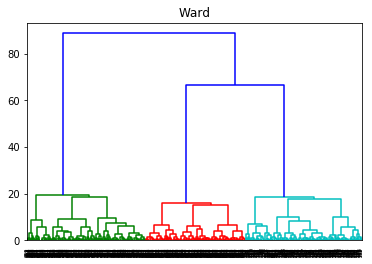

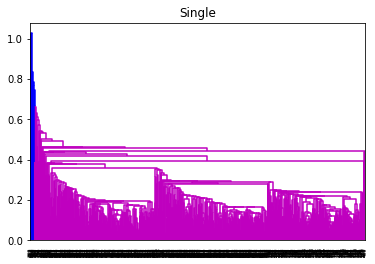

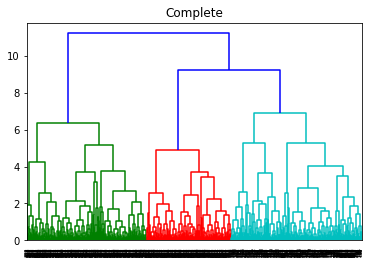

In [45]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage


def main():
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3

    Z = linkage(X, 'ward')
    print("Z.shape:", Z.shape)
    # Z has the format [idx1, idx2, dist, sample_count]
    # therefore, its size will be (N-1, 4)

    # from documentation:
    # A (n-1) by 4 matrix Z is returned. At the i-th iteration,
    # clusters with indices Z[i, 0] and Z[i, 1] are combined to
    # form cluster n + i. A cluster with an index less than n
    # corresponds to one of the original observations.
    # The distance between clusters Z[i, 0] and Z[i, 1] is given
    # by Z[i, 2]. The fourth value Z[i, 3] represents the number
    # of original observations in the newly formed cluster.
    plt.title("Ward")
    dendrogram(Z)
    plt.show()

    Z = linkage(X, 'single')
    plt.title("Single")
    dendrogram(Z)
    plt.show()

    Z = linkage(X, 'complete')
    plt.title("Complete")
    dendrogram(Z)
    plt.show()


if __name__ == '__main__':
    main()

### EVOLUTION EXAMPLE

Finished creating generation 2 / 100, size = 5
Finished creating generation 3 / 100, size = 11
Finished creating generation 4 / 100, size = 20
Finished creating generation 5 / 100, size = 44
Finished creating generation 6 / 100, size = 88
Finished creating generation 7 / 100, size = 175
Finished creating generation 8 / 100, size = 353
Finished creating generation 9 / 100, size = 719
Finished creating generation 10 / 100, size = 1000
Finished creating generation 11 / 100, size = 1000
Finished creating generation 12 / 100, size = 1000
Finished creating generation 13 / 100, size = 1000
Finished creating generation 14 / 100, size = 1000
Finished creating generation 15 / 100, size = 1000
Finished creating generation 16 / 100, size = 1000
Finished creating generation 17 / 100, size = 1000
Finished creating generation 18 / 100, size = 1000
Finished creating generation 19 / 100, size = 1000
Finished creating generation 20 / 100, size = 1000
Finished creating generation 21 / 100, size = 1000
Fi

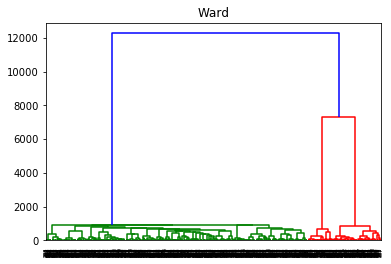

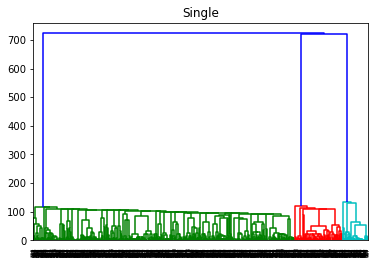

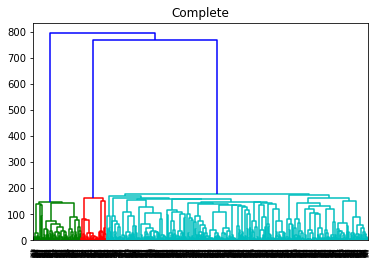

In [46]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import random
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# our genetic code
code = ['A', 'T', 'C', 'G']


# convert list of integers to corresponding letters
def to_code(a):
    return [code[i] for i in a]


# distance between 2 DNA strands
def dist(a, b):
    return sum(i != j for i, j in zip(a, b))


# generate offspring by modifying some characters in the code
def generate_offspring(parent):
    return [maybe_modify(c) for c in parent]


# modify letter c with probability ~1/1000
def maybe_modify(c):
    if np.random.random() < 0.001:
        return np.random.choice(code)
    return c
  


# create 3 distinct ancestors
p1 = to_code(np.random.randint(4, size=1000))
p2 = to_code(np.random.randint(4, size=1000))
p3 = to_code(np.random.randint(4, size=1000))


# create offspring
num_generations = 99
max_offspring_per_generation = 1000
current_generation = [p1, p2, p3]
for i in range(num_generations):

    next_generation = []
    for parent in current_generation:
    # each parent will have between 1 and 3 children
        num_offspring = np.random.randint(3) + 1

        # generate the offspring
        for _ in range(num_offspring):
            child = generate_offspring(parent)
            next_generation.append(child)

    current_generation = next_generation

    # limit the number of offspring
    random.shuffle(current_generation)
    current_generation = current_generation[:max_offspring_per_generation]

    print("Finished creating generation %d / %d, size = %d" % (i + 2, num_generations + 1, len(current_generation)))



# create distance matrix
# note: you can also use scipy's pdist for this
# but NOT sklearn's pairwise_distances function
# which does not return a symmetric matrix
N = len(current_generation)
dist_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        elif j > i:
            a = current_generation[i]
            b = current_generation[j]
            dist_matrix[i,j] = dist(a, b)
        else:
            dist_matrix[i,j] = dist_matrix[j,i]

dist_array = ssd.squareform(dist_matrix)

Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z)
plt.show()

Z = linkage(dist_array, 'single')
plt.title("Single")
dendrogram(Z)
plt.show()

Z = linkage(dist_array, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()

### PRESIDENTIAL TWEETS

proportion @realDonaldTrump: 0.490
proportion @HillaryClinton: 0.510


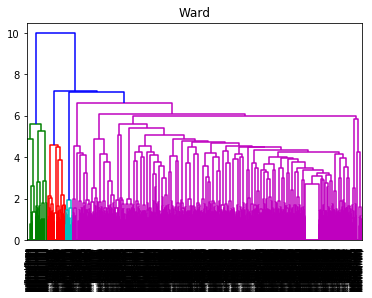

values in C: {1, 2}
purity: 0.5655
purity of @realDonaldTrump cluster: 0.944444444444
purity of @HillaryClinton cluster: 0.540021344717
classifier score: 0.94739292365

Top 10 'Donald cluster' words:
thank
trump2016
makeamericagreatagain
new
will
trump
amp
get
just
very

Top 10 'Hillary cluster' words:
trump
hillary
we
will
he
our
great
not
america
donald


In [48]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
# data from https://www.kaggle.com/benhamner/clinton-trump-tweets
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import pairwise_distances ### fast, but result not symmetric



# load stopwords
# selected after observing results without stopwords
stopwords = [
  'the',
  'about',
  'an',
  'and',
  'are',
  'at',
  'be',
  'can',
  'for',
  'from',
  'if',
  'in',
  'is',
  'it',
  'of',
  'on',
  'or',
  'that',
  'this',
  'to',
  'you',
  'your',
  'with',
]


# find urls and twitter usernames within a string
url_finder = re.compile(r"(?:\@|https?\://)\S+")


def filter_tweet(s):
    s = s.lower() # downcase
    s = url_finder.sub("", s) # remove urls and usernames
    return s



### load data ###
df = pd.read_csv('/Users/hector/Documents/machine_learning_examples/unsupervised_class/tweets.csv')
text = df.text.tolist()
text = [filter_tweet(s) for s in text]


# transform the text into a data matrix
tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords)
X = tfidf.fit_transform(text).todense()


# subsample for efficiency
# remember: calculating distances is O(N^2)
N = X.shape[0]
idx = np.random.choice(N, size=2000, replace=False)
x = X[idx]
labels = df.handle[idx].tolist()


# proportions of each label
# so we can be confident that each is represented equally
pTrump = sum(1.0 if e == 'realDonaldTrump' else 0.0 for e in labels) / len(labels)
print("proportion @realDonaldTrump: %.3f" % pTrump)
print("proportion @HillaryClinton: %.3f" % (1 - pTrump))


# transform the data matrix into pairwise distances list
dist_array = pdist(x)


# calculate hierarchy
Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z, labels=labels)
plt.show()

### hits max recursion depth
# Z = linkage(dist_array, 'single')
# plt.title("Single")
# dendrogram(Z, labels=labels)
# plt.show()

# Z = linkage(dist_array, 'complete')
# plt.title("Complete")
# dendrogram(Z, labels=labels)
# plt.show()


# convert labels to (1, 2), not (0, 1)
# since that's what's returned by fcluster
Y = np.array([1 if e == 'realDonaldTrump' else 2 for e in labels])


# get cluster assignments
# threshold 9 was chosen empirically to yield 2 clusters
C = fcluster(Z, 9, criterion='distance') # returns 1, 2, ..., K
categories = set(C)
# sanity check: should be {1, 2}
print("values in C:", categories)


### calculate the purity of our clusters ###
def purity(true_labels, cluster_assignments, categories):
    # maximum purity is 1, higher is better
    N = len(true_labels)

    total = 0.0
    for k in categories:
        max_intersection = 0
        for j in categories:
            intersection = ((cluster_assignments == k) & (true_labels == j)).sum()
            if intersection > max_intersection:
                max_intersection = intersection
        total += max_intersection
    return total / N

print("purity:", purity(Y, C, categories))


# we know the smaller cluster is the trump cluster
#
# important note: we call it the trump cluster from
# observing AFTER the fact that most tweets in this
# cluster are by trump
# we do NOT use those labels to create the cluster
#
# we create the clusters using a distance-based
# algorithm which knows nothing about the labels,
# just the tf-idf scores.
#
# it just so happens that most of the tweets in
# one of the clusters is by trump, and that this
# cluster is very small
if (C == 1).sum() < (C == 2).sum():
    d = 1
    h = 2
else:
    d = 2
    h = 1

actually_donald = ((C == d) & (Y == 1)).sum()
donald_cluster_size = (C == d).sum()
print("purity of @realDonaldTrump cluster:", float(actually_donald) / donald_cluster_size)

actually_hillary = ((C == h) & (Y == 2)).sum()
hillary_cluster_size = (C == h).sum()
print("purity of @HillaryClinton cluster:", float(actually_hillary) / hillary_cluster_size)


# just for interest, how would a classifier do?
# note: classification is always easier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, df.handle)
print("classifier score:", rf.score(X, df.handle))

# same as mnist
# classifier yields almost 100% accuracy
# but purity of clustering is much lower



# what words have the highest tf-idf in cluster 1? in cluster 2?
w2i = tfidf.vocabulary_

# tf-idf vectorizer todense() returns a matrix rather than array
# matrix always wants to be 2-D, so we convert to array in order to flatten
d_avg = np.array(x[C == d].mean(axis=0)).flatten()
d_sorted = sorted(w2i.keys(), key=lambda w: -d_avg[w2i[w]])

print("\nTop 10 'Donald cluster' words:")
print("\n".join(d_sorted[:10]))

h_avg = np.array(x[C == h].mean(axis=0)).flatten()
h_sorted = sorted(w2i.keys(), key=lambda w: -h_avg[w2i[w]])

print("\nTop 10 'Hillary cluster' words:")
print("\n".join(h_sorted[:10]))

### GMM Example

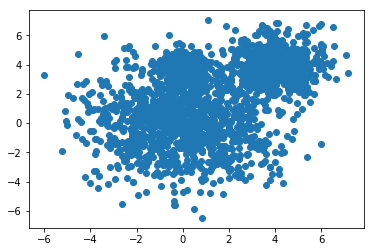

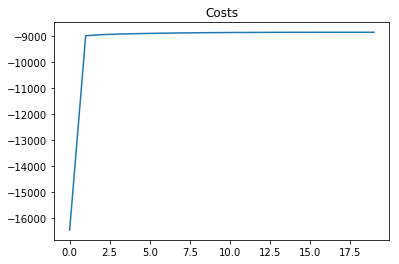

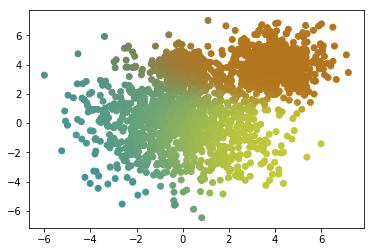

pi: [ 0.44533061  0.28810365  0.26656574]
means: [[ 2.81762187  3.8726744 ]
 [ 0.76500862 -0.45334838]
 [-1.06121301  0.18227841]]
covariances: [[[ 4.1023864   0.22544389]
  [ 0.22544389  1.0659298 ]]

 [[ 3.05932932 -0.42648454]
  [-0.42648454  2.83501464]]

 [[ 2.57404459  0.19592438]
  [ 0.19592438  4.7560544 ]]]


In [49]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal


def gmm(X, K, max_iter=20, smoothing=1e-2):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K) / K # uniform

    # initialize M to random, initialize C to spherical with variance 1
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.eye(D)

    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((N, K)) # we'll use these to store the PDF value of sample n and Gaussian k
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # this is the slow way
        # for k in range(K):
        #     for n in range(N):
        #         weighted_pdfs[n,k] = pi[k]*multivariate_normal.pdf(X[n], M[k], C[k])

        # for k in range(K):
        #     for n in range(N):
        #         R[n,k] = weighted_pdfs[n,k] / weighted_pdfs[n,:].sum()

        # a faster way to do step 1: "vectorization"
        for k in range(K):
            weighted_pdfs[:,k] = pi[k]*multivariate_normal.pdf(X, M[k], C[k])
        R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)

        # step 2: recalculate params
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk
            C[k] = np.sum(R[n,k]*np.outer(X[n] - M[k], X[n] - M[k]) for n in range(N)) / Nk + np.eye(D)*smoothing


        costs[i] = np.log(weighted_pdfs.sum(axis=1)).sum()
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break

    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R


def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 2000 # number of samples
    X = np.zeros((N, D))
    X[:1200, :] = np.random.randn(1200, D)*2 + mu1
    X[1200:1800, :] = np.random.randn(600, D) + mu2
    X[1800:, :] = np.random.randn(200, D)*0.5 + mu3

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3
    gmm(X, K)



if __name__ == '__main__':
    main()

### GMM for Mnist data